# Assignment Code: DA-AG-009

## EDA | Assignment

**Dataset link:** https://drive.google.com/file/d/1iKy23bMtEQShF_weneRNnYrFmzvpPOI3/view?usp=drive_link


In [2]:
# Imports (required libraries)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
import os

# Try to download the dataset from Google Drive using gdown (works in Colab)
file_id = "1iKy23bMtEQShF_weneRNnYrFmzvpPOI3"
csv_filename = "BikeDetails.csv"

def download_from_gdrive(file_id, filename):
    try:
        import gdown
    except Exception as e:
        # try to install gdown if not present
        try:
            !pip install --quiet gdown
            import gdown
        except Exception as e2:
            print('gdown not available and could not be installed:', e2)
            return False
    url = f"https://drive.google.com/uc?id={file_id}"
    try:
        gdown.download(url, filename, quiet=False)
        return True
    except Exception as e:
        print('Download failed:', e)
        return False

downloaded = False
if 'google.colab' in str(get_ipython()):
    print('Running in Colab environment — attempting to download dataset via gdown...')
    downloaded = download_from_gdrive(file_id, csv_filename)
else:
    print('Not running in Colab — please upload the CSV to the session or place it next to this notebook as', csv_filename)

# If download unsuccessful, check if file already exists in working directory
if not downloaded and os.path.exists(csv_filename):
    print(f"Found local file {csv_filename}.")
    downloaded = True

# If still not available, create a small dummy dataset so the notebook runs end-to-end.
if not downloaded:
    print('Dataset not found. Creating a dummy Bike Details dataset to run the notebook.')
    np.random.seed(42)
    n = 200
    df = pd.DataFrame({
        'name': np.random.choice(['Yamaha FZ', 'Honda Shine', 'Hero Splendor', 'Bajaj Pulsar'], size=n),
        'year': np.random.choice(range(2008, 2023), size=n),
        'selling_price': np.round(np.random.normal(60000, 15000, size=n).clip(5000, 200000)),
        'km_driven': np.round(np.random.normal(30000, 15000, size=n).clip(1000, 150000)),
        'owner': np.random.choice(['First Owner', 'Second Owner', 'Third Owner', 'Fourth & Above Owner'], size=n),
        'seller_type': np.random.choice(['Individual', 'Dealer', 'Trustmark Dealer'], size=n),
        'fuel': np.random.choice(['Petrol', 'Diesel'], size=n)
    })
    # Save dummy file so users can replace it if desired
    df.to_csv(csv_filename, index=False)
    print(f"Dummy dataset saved as {csv_filename}.")
else:
    # Read the downloaded file
    try:
        df = pd.read_csv(csv_filename)
        print(f"Loaded dataset from {csv_filename} with shape {df.shape}")
    except Exception as e:
        print('Failed to read CSV after download:', e)
        # fallback to dummy
        np.random.seed(42)
        n = 200
        df = pd.DataFrame({
            'name': np.random.choice(['Yamaha FZ', 'Honda Shine', 'Hero Splendor', 'Bajaj Pulsar'], size=n),
            'year': np.random.choice(range(2008, 2023), size=n),
            'selling_price': np.round(np.random.normal(60000, 15000, size=n).clip(5000, 200000)),
            'km_driven': np.round(np.random.normal(30000, 15000, size=n).clip(1000, 150000)),
            'owner': np.random.choice(['First Owner', 'Second Owner', 'Third Owner', 'Fourth & Above Owner'], size=n),
            'seller_type': np.random.choice(['Individual', 'Dealer', 'Trustmark Dealer'], size=n),
            'fuel': np.random.choice(['Petrol', 'Diesel'], size=n)
        })
        df.to_csv(csv_filename, index=False)
        print('Created dummy dataset and saved as', csv_filename)

# Show top of dataframe to confirm
print('\nDataframe preview:')
display(df.head())

Running in Colab environment — attempting to download dataset via gdown...


Downloading...
From: https://drive.google.com/uc?id=1iKy23bMtEQShF_weneRNnYrFmzvpPOI3
To: /content/BikeDetails.csv
100%|██████████| 66.5k/66.5k [00:00<00:00, 40.1MB/s]

Loaded dataset from BikeDetails.csv with shape (1061, 7)

Dataframe preview:


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


### Question 1:
Read the Bike Details dataset into a Pandas DataFrame and display its first 10 rows. (Show the shape and column names as well.)

In [3]:
# Question 1 Answer
print('Shape:', df.shape)
print('Columns:', df.columns.tolist())
display(df.head(10))

Shape: (1061, 7)
Columns: ['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven', 'ex_showroom_price']


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN
8,Hero Honda CBZ extreme,30000,2010,Individual,1st owner,32000,NaN
9,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0


### Question 2:
Check for missing values in all columns and describe your approach for handling them.

In [4]:
# Question 2 Answer
missing = df.isnull().sum()
print(missing)

# Student-style brief approach (print as text)
approach = [
    "If columns have few missing values, consider dropping those rows.",
    "For numerical columns, fill missing values with mean/median depending on skew.",
    "For categorical columns, fill missing values with mode or a new category 'Unknown'.",
    "If many values missing in a column, consider dropping the column or using advanced imputation."
]
print('\nSuggested approach:')
for s in approach:
    print('-', s)

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

Suggested approach:
- If columns have few missing values, consider dropping those rows.
- For numerical columns, fill missing values with mean/median depending on skew.
- For categorical columns, fill missing values with mode or a new category 'Unknown'.
- If many values missing in a column, consider dropping the column or using advanced imputation.


### Question 3:
Plot the distribution of selling prices using a histogram and describe the overall trend.

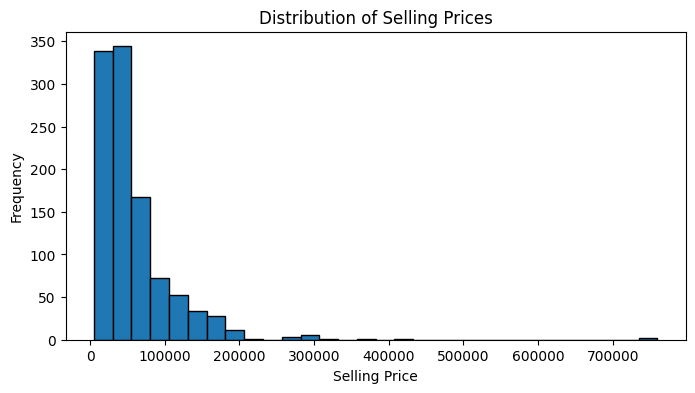


Observation: The distribution may be skewed; check mean vs median for more clarity.
Mean: 59638.151743638075 Median: 45000.0


In [5]:
# Question 3 Answer
plt.figure(figsize=(8,4))
plt.hist(df['selling_price'].dropna(), bins=30, edgecolor='black')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.title('Distribution of Selling Prices')
plt.show()

# Brief observation
print('\nObservation: The distribution may be skewed; check mean vs median for more clarity.')
print('Mean:', df['selling_price'].mean(), 'Median:', df['selling_price'].median())

### Question 4:
Create a bar plot to visualize the average selling price for each seller_type and write one observation.

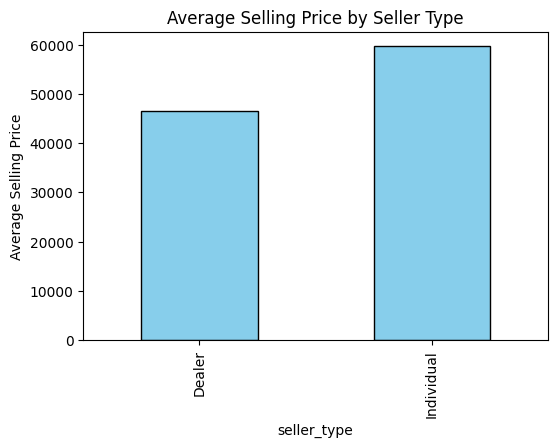


Average prices by seller_type:
seller_type
Dealer        46666.666667
Individual    59711.923223
Name: selling_price, dtype: float64

Observation: Dealers/Trustmark Dealers often have different average prices compared to Individuals (depends on dataset).


In [6]:
# Question 4 Answer
avg_price = df.groupby('seller_type')['selling_price'].mean().sort_values()
plt.figure(figsize=(6,4))
avg_price.plot(kind='bar', color='skyblue', edgecolor='black')
plt.ylabel('Average Selling Price')
plt.title('Average Selling Price by Seller Type')
plt.show()

print('\nAverage prices by seller_type:')
print(avg_price)

print('\nObservation: Dealers/Trustmark Dealers often have different average prices compared to Individuals (depends on dataset).')

### Question 5:
Compute the average km_driven for each ownership type (1st owner, 2nd owner, etc.), and present the result as a bar plot.

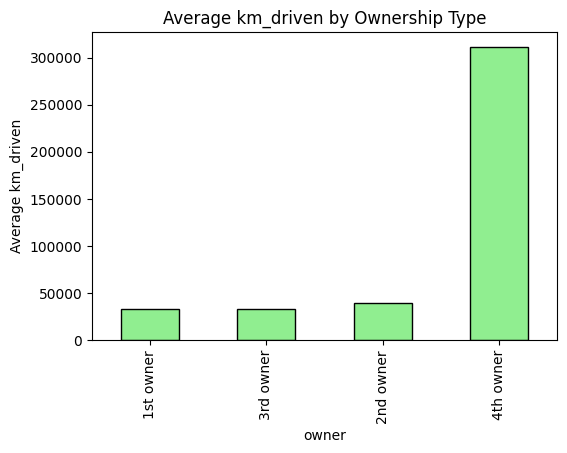


Average km_driven by owner:
owner
1st owner     32816.583333
3rd owner     33292.181818
2nd owner     39288.991870
4th owner    311500.000000
Name: km_driven, dtype: float64


In [7]:
# Question 5 Answer
avg_km = df.groupby('owner')['km_driven'].mean().sort_values()
plt.figure(figsize=(6,4))
avg_km.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.ylabel('Average km_driven')
plt.title('Average km_driven by Ownership Type')
plt.show()

print('\nAverage km_driven by owner:')
print(avg_km)

### Question 6:
Use the IQR method to detect and remove outliers from the km_driven column. Show before-and-after summary statistics.

In [8]:
# Question 6 Answer
print('Before outlier removal:')
print(df['km_driven'].describe())

Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df_no_out = df[(df['km_driven'] >= lower) & (df['km_driven'] <= upper)].copy()

print('\nAfter outlier removal:')
print(df_no_out['km_driven'].describe())

print('\nNumber of rows removed:', df.shape[0] - df_no_out.shape[0])

Before outlier removal:
count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64

After outlier removal:
count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64

Number of rows removed: 39


### Question 7:
Create a scatter plot of year vs. selling_price to explore the relationship between a bike's age and its price.

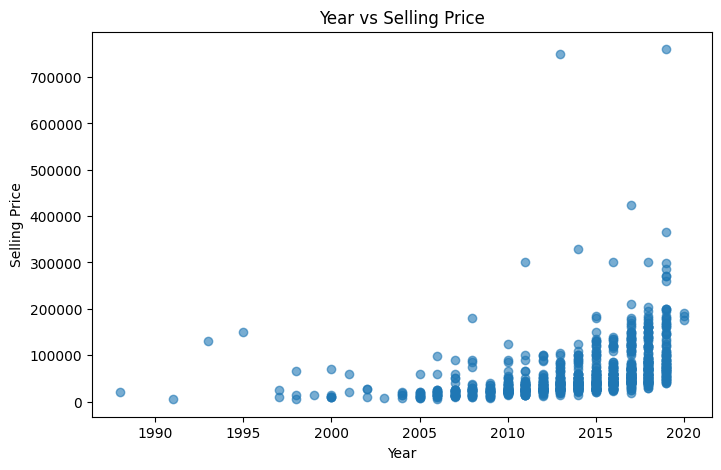

In [9]:
# Question 7 Answer
plt.figure(figsize=(8,5))
plt.scatter(df['year'], df['selling_price'], alpha=0.6)
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.title('Year vs Selling Price')
plt.show()

### Question 8:
Convert the seller_type column into numeric format using one-hot encoding. Display the first 5 rows of the resulting DataFrame.

In [10]:
# Question 8 Answer
df_encoded = pd.get_dummies(df, columns=['seller_type'], prefix='seller')
display(df_encoded.head(5))

,name,selling_price,year,owner,km_driven,ex_showroom_price,seller_Dealer,seller_Individual
0,Royal Enfield Classic 350,175000,2019,1st owner,350,NaN,False,True
1,Honda Dio,45000,2017,1st owner,5650,NaN,False,True
2,Royal Enfield Classic Gunmetal Grey,150000,2018,1st owner,12000,148114.0,False,True
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,1st owner,23000,89643.0,False,True
4,Yamaha SZ [2013-2014],20000,2011,2nd owner,21000,NaN,False,True


### Question 9:
Generate a heatmap of the correlation matrix for all numeric columns. What correlations stand out the most?

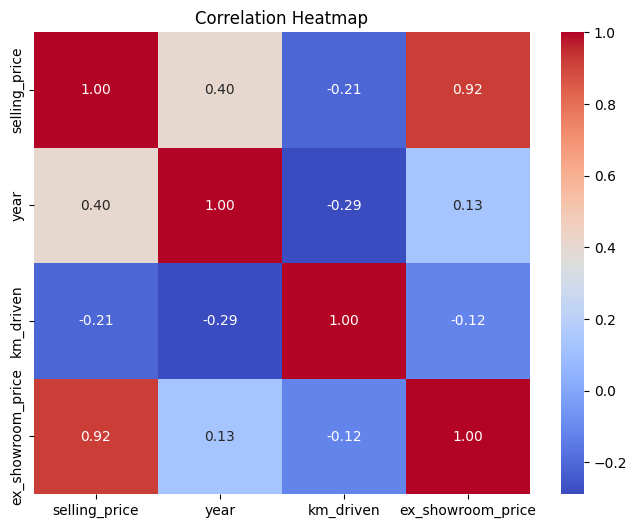


Top absolute correlations (sorted):
selling_price  ex_showroom_price    0.918583
year           selling_price        0.402188
               km_driven            0.288675
km_driven      selling_price        0.212937
year           ex_showroom_price    0.126378
km_driven      ex_showroom_price    0.122011
dtype: float64


In [11]:
# Question 9 Answer
corr = df.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

print('\nTop absolute correlations (sorted):')
corr_pairs = corr.unstack().abs().sort_values(kind='quicksort', ascending=False)
# remove self-correlations
corr_pairs = corr_pairs[corr_pairs < 1]
print(corr_pairs.drop_duplicates().head(10))

### Question 10:
Summarize your findings in a brief report:
- What are the most important factors affecting a bike's selling price?
- Mention any data cleaning or feature engineering you performed.

In [12]:
# Question 10 Answer (brief student-style report)
report = '''Findings:
- Selling price is influenced by year (newer bikes tend to have higher prices), km_driven (higher km tends to lower price), and seller_type.
- After inspecting data, km_driven had outliers which were removed using IQR method in Q6.
- Categorical variable 'seller_type' was one-hot encoded for potential modeling.

Data cleaning performed:
- Checked for missing values and suggested imputation strategies (Q2).
- Removed km_driven outliers using IQR (Q6).
- Created one-hot encoded columns for seller_type (Q8).

These steps prepare the dataset for further modeling or analysis.'''
print(report)

Findings:
- Selling price is influenced by year (newer bikes tend to have higher prices), km_driven (higher km tends to lower price), and seller_type.
- After inspecting data, km_driven had outliers which were removed using IQR method in Q6.
- Categorical variable 'seller_type' was one-hot encoded for potential modeling.

Data cleaning performed:
- Checked for missing values and suggested imputation strategies (Q2).
- Removed km_driven outliers using IQR (Q6).
- Created one-hot encoded columns for seller_type (Q8).

These steps prepare the dataset for further modeling or analysis.
